In [1]:
# if "preprocessing" folder in current folders -> cd back to original folder
%cd /content
import os
if os.path.exists("bsc-thesis"):
  # if bsc-thesis folder already exists; completely remove
  !rm -rf bsc-thesis

# this makes sure cached files are readily available (for calling e.g. `gather_data_cached`)
!apt-get install git-lfs
!git lfs install

# cloning repo
branch = "main"
!git clone --branch $branch https://github.com/maviddoerdijk/bsc-thesis.git

# moving into project dir
%cd bsc-thesis
!pip install -r requirements.txt
%cd src
%ls

/content
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git-lfs is already the newest version (3.0.2-1ubuntu0.3).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
Git LFS initialized.
Cloning into 'bsc-thesis'...
remote: Enumerating objects: 392, done.
remote: Counting objects: 100% (136/136), done.
remote: Compressing objects: 100% (115/115), done.
remote: Total 392 (delta 47), reused 83 (delta 16), pack-reused 256 (from 1)
Receiving objects: 100% (392/392), 11.59 MiB | 14.40 MiB/s, done.
Resolving deltas: 100% (194/194), done.
/content/bsc-thesis
  Using cached transformers-4.40.1-py3-none-any.whl.metadata (137 kB)
  Using cached tokenizers-0.19.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.7 kB)
Using cached transformers-4.40.1-py3-none-any.whl (9.0 MB)
Using cached tokenizers-0.19.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.6 MB)
  Attempting uninstall: tokenizers
    Fou

In [2]:
# additional path traversing for this notebook
%cd external/time_moe_repo
%ls

/content/bsc-thesis/src/external/time_moe_repo
datasets/    main.ipynb                 torch_dist_run.py
figures/     main.py                    training_wrapper.py
__init__.py  original_requirements.txt  training_wrapper_test.py
LICENSE      run_eval.py
logs/        time_moe/


In [3]:
# bug fix
!pip install peft==0.10.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 kB 3.5 MB/s eta 0:00:00
  Attempting uninstall: peft
    Found existing installation: peft 0.15.2
    Uninstalling peft-0.15.2:
      Successfully uninstalled peft-0.15.2


In [4]:
from training_wrapper import train_time_moe
# import wandb
# wandb.login()

data_path = "datasets/train_data_2010_10_01_2024_10_02_4416cb3b.jsonl"
train_time_moe(
    data_path=data_path,
    dataloader_num_workers=2
)

2025-05-13 13:51:01,553 - log_util.py[pid:7180;line:52:log_in_local_rank_0] - INFO: Set global_batch_size to 64
2025-05-13 13:51:01,554 - log_util.py[pid:7180;line:52:log_in_local_rank_0] - INFO: Set micro_batch_size to 16
2025-05-13 13:51:01,556 - log_util.py[pid:7180;line:52:log_in_local_rank_0] - INFO: Set gradient_accumulation_steps to 4
2025-05-13 13:51:01,556 - log_util.py[pid:7180;line:52:log_in_local_rank_0] - INFO: Set precision to fp32
2025-05-13 13:51:01,560 - log_util.py[pid:7180;line:52:log_in_local_rank_0] - INFO: Set normalization to zero
2025-05-13 13:51:01,566 - log_util.py[pid:7180;line:48:log_in_local_rank_0] - WARNING: Flash attention import failed, switching to eager attention.
2025-05-13 13:51:01,567 - log_util.py[pid:7180;line:52:log_in_local_rank_0] - INFO: Use Eager Attention


/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/891 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/227M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/69.0 [00:00<?, ?B/s]

2025-05-13 13:51:05,978 - log_util.py[pid:7180;line:52:log_in_local_rank_0] - INFO: Load model parameters from: Maple728/TimeMoE-50M
2025-05-13 13:51:05,983 - log_util.py[pid:7180;line:52:log_in_local_rank_0] - INFO: {'max_length': 1024, 'stride': None, 'data_path': 'datasets/train_data_2010_10_01_2024_10_02_4416cb3b.jsonl', 'normalization_method': 'zero', 'attn_implementation': 'auto', 'micro_batch_size': 16, 'global_batch_size': 64, 'train_steps': None, 'num_train_epochs': 1.0, 'precision': 'fp32', 'evaluation_strategy': 'no', 'eval_steps': None, 'save_strategy': 'no', 'save_steps': None, 'learning_rate': 0.0001, 'min_learning_rate': 5e-05, 'adam_beta1': 0.9, 'adam_beta2': 0.95, 'adam_epsilon': 1e-08, 'lr_scheduler_type': 'cosine', 'warmup_ratio': 0.0, 'warmup_steps': 0, 'weight_decay': 0.1, 'gradient_checkpointing': False, 'deepspeed': None, 'logging_steps': 1, 'max_grad_norm': 1.0, 'dataloader_num_workers': 4, 'save_only_model': False, 'save_total_limit': None}
2025-05-13 13:51:05,

100%|██████████| 1/1 [00:00<00:00, 6335.81it/s]
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
wandb: Currently logged in as: davidmoerdijk (davidmoerdijk-smart-backoffice) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Step,Training Loss
1,0.032500


2025-05-13 13:51:51,160 - log_util.py[pid:7180;line:52:log_in_local_rank_0] - INFO: Saving model to logs/time_moe


The repository for logs/time_moe contains custom code which must be executed to correctly load the model. You can inspect the repository content at https://hf.co/logs/time_moe.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Predicted shape: torch.Size([1, 128, 1])


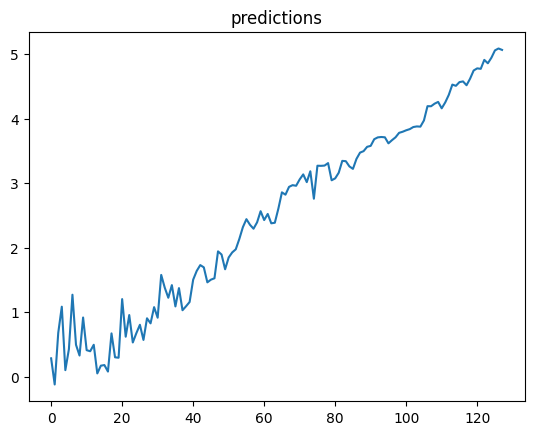

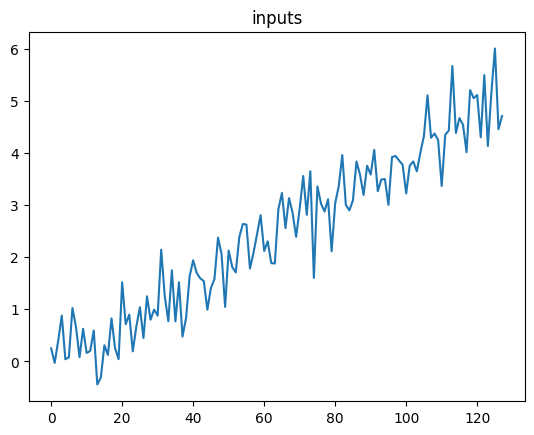

In [23]:
import torch
import numpy as np
from transformers import AutoConfig
from time_moe.models.modeling_time_moe import TimeMoeForPrediction

model_dir = "logs/time_moe"
config = AutoConfig.from_pretrained(model_dir)
model = TimeMoeForPrediction.from_pretrained(model_dir, config=config, torch_dtype=torch.float32)
model.eval()

seq_len = 128
batch_size = 1
np.random.seed(42)
trend = np.linspace(0, 5, seq_len)  # increasing trend
noise = np.random.normal(loc=0.0, scale=0.5, size=seq_len)
series = trend + noise
series = series.reshape(batch_size, seq_len, 1)  # shape: (1, 128, 1)

# normalizing
mean = series.mean()
std = series.std()
normalized_series = (series - mean) / std
input_tensor = torch.tensor(normalized_series, dtype=torch.float32)

attention_mask = torch.ones((batch_size, seq_len), dtype=torch.float32) # not sure what to do with the attention mask ..

with torch.no_grad():
    output = model(input_ids=input_tensor, attention_mask=attention_mask)

predictions = output.logits  # output shape: [B, T, forecast_horizon * input_size]

predictions_np = predictions.numpy()
denormalized_preds = predictions_np * std + mean

print("Predicted shape:", predictions.shape)

plt.title("predictions")
plt.plot(denormalized_preds[0, :, :])
plt.show()

plt.title("inputs")
plt.plot(series[0, :, :])
plt.show()